<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-Tutorial" data-toc-modified-id="Regression-Tutorial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression Tutorial</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-data-from-csv-file" data-toc-modified-id="Load-data-from-csv-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data from csv file</a></span></li><li><span><a href="#Load-data-by-using-sklearn-api" data-toc-modified-id="Load-data-by-using-sklearn-api-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data by using sklearn api</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Value,-Distribution-plot" data-toc-modified-id="Value,-Distribution-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Value, Distribution plot</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Mean,-Median,-Max,-Min" data-toc-modified-id="Mean,-Median,-Max,-Min-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Mean, Median, Max, Min</a></span></li></ul></li><li><span><a href="#Build-Regression-Model" data-toc-modified-id="Build-Regression-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Regression Model</a></span><ul class="toc-item"><li><span><a href="#Divide-train/validation-set" data-toc-modified-id="Divide-train/validation-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Divide train/validation set</a></span></li><li><span><a href="#Train-/-Evaluate" data-toc-modified-id="Train-/-Evaluate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train / Evaluate</a></span></li></ul></li></ul></div>

# Regression Tutorial

- **Problem** : Regression
- **Description**: Given dataset, build a regression model which predicts Y
- **Dataset**: 11 numeric columns
    - Numeric columns: Age, Sex, Body mass index, Average blood pressure, S1, S2, S3, S4, S5, S6
    - Target value : Y
- **Requirement** 
    - Divide train/validation set for training, evaluation by your own.
    - Provide evaluation score of train/validation set respectively.
- **Evaluation Metric**
    - You should select an appropriate metric, and evaluate your model on it.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import xgboost as xgb

In [3]:
from matplotlib import rc
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.grid"] = True

# Load Data

## Load data from csv file

- Just to show how to load .csv file
- Iris dataset will not be used in this tutorial

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), 'data', 'iris.csv'))
print('Path : ', path)

dataset = pd.read_csv(path)
print('Shape of data : ', dataset.shape)
display(dataset.head())

Path :  /Users/HyeonWoo/Library/Mobile Documents/com~apple~CloudDocs/1. Career/KU-BIG/2019-1/KUBIG_2019_Spring/data/iris.csv
Shape of data :  (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Load data by using sklearn api
- Load Diabetes data by using sklearn api
- X : 10 numerical columns
- Y : 1 numerical column

In [5]:
dataset = load_diabetes()
# load_diabetes() returns Bunch(dictionary-like object) : (data, target)
# for further information, check sklearn.datasets.load_diabetes document
data_x = pd.DataFrame(dataset['data'])
data_y = pd.DataFrame(dataset['target'])
# concat x and y to make dataframe, just for visualization
df = pd.concat([data_x, data_y], axis=1)
df.columns = ['Age', 'Sex', 'Body mass index', 'Average blood pressure', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [6]:
print(df.shape)
display(df.head())

(442, 11)


,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# EDA

## Value, Distribution plot

- It seems x datas are already standardized

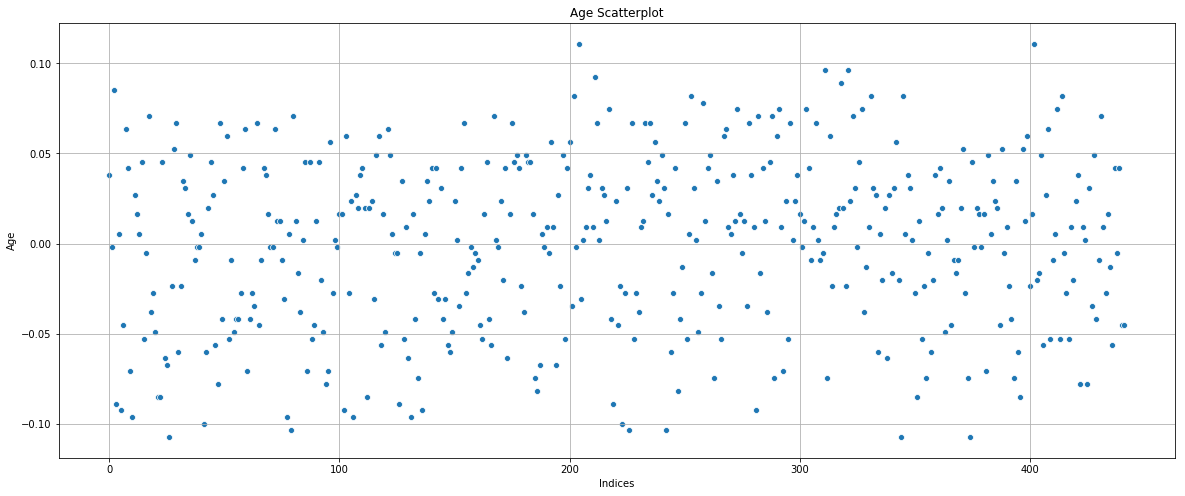

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


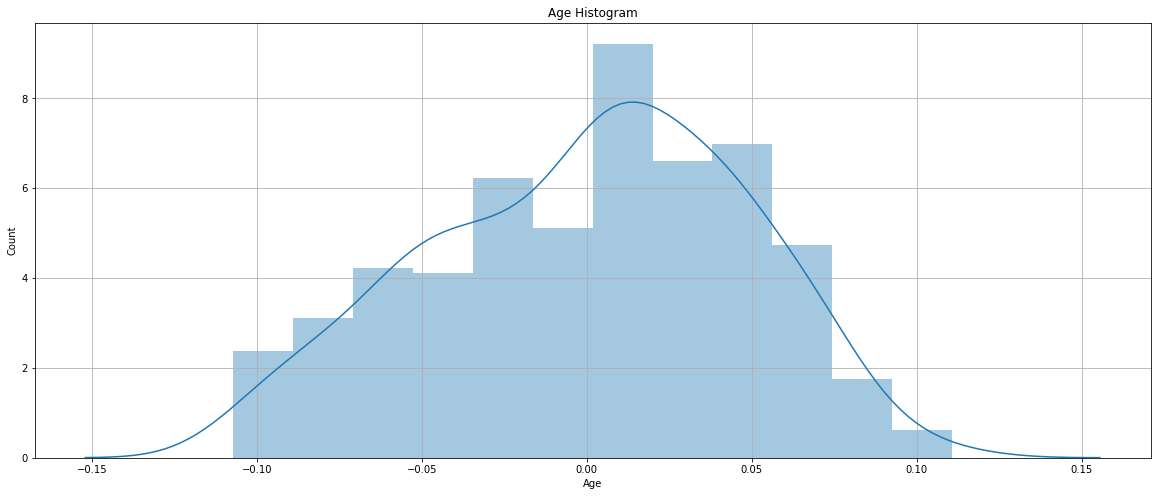

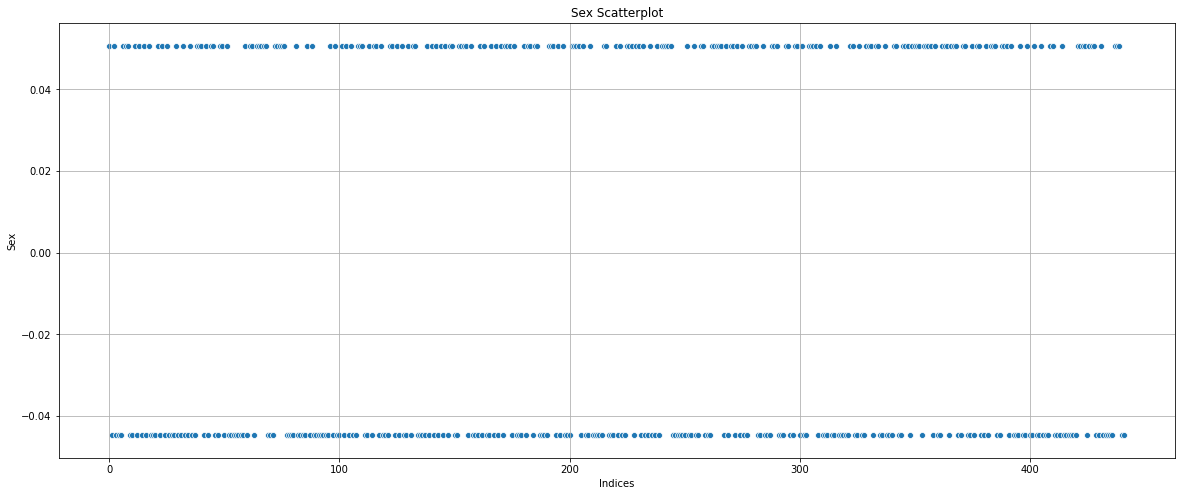

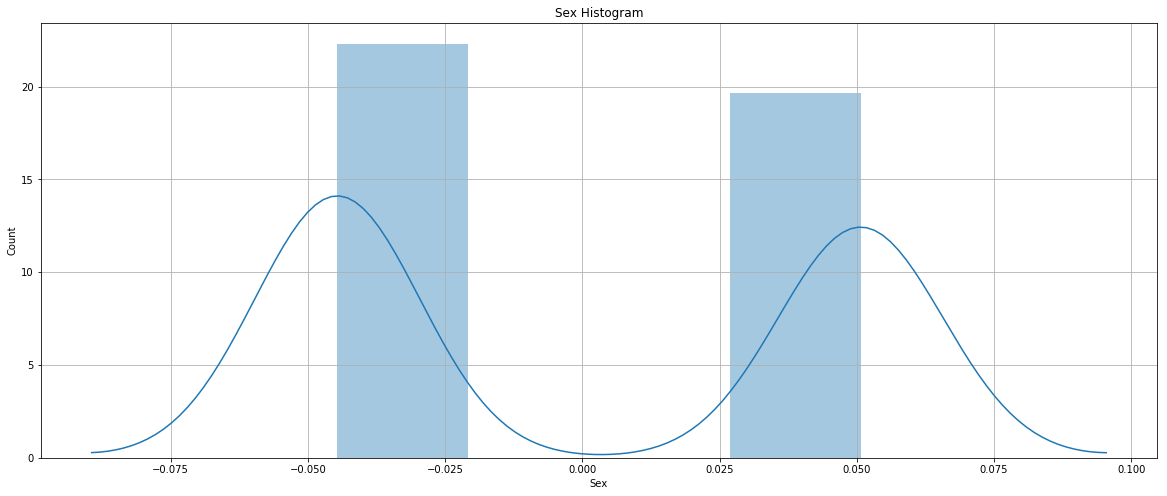

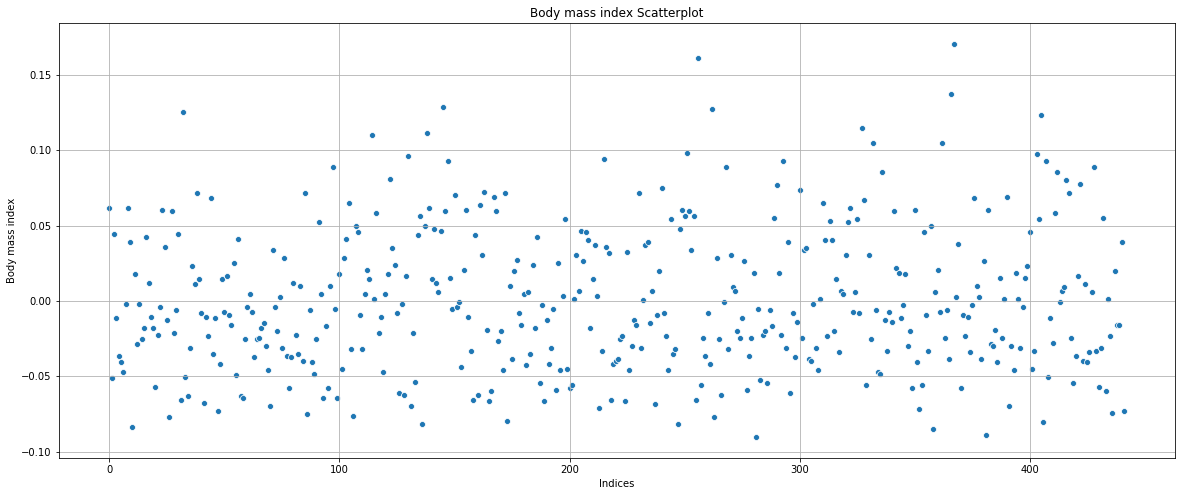

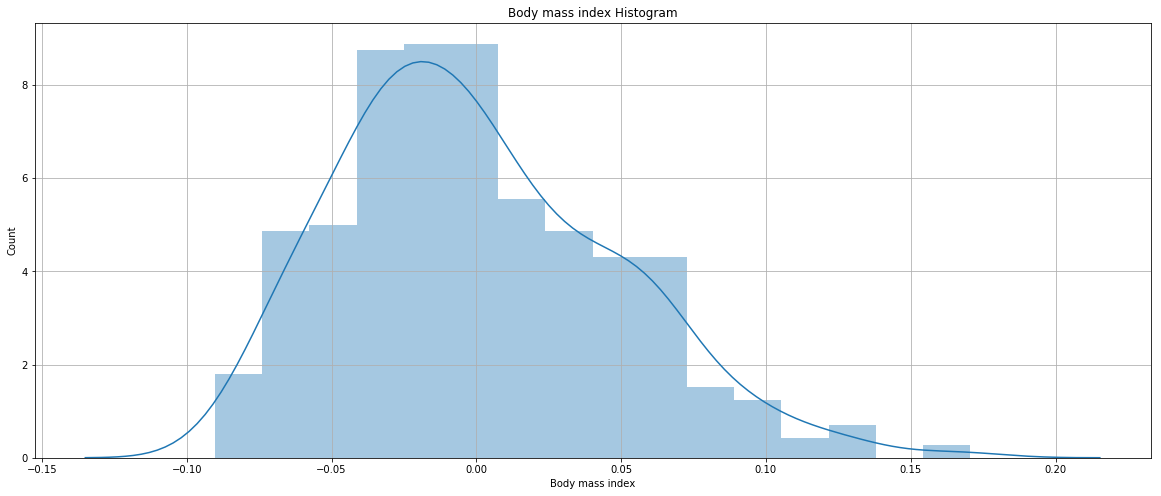

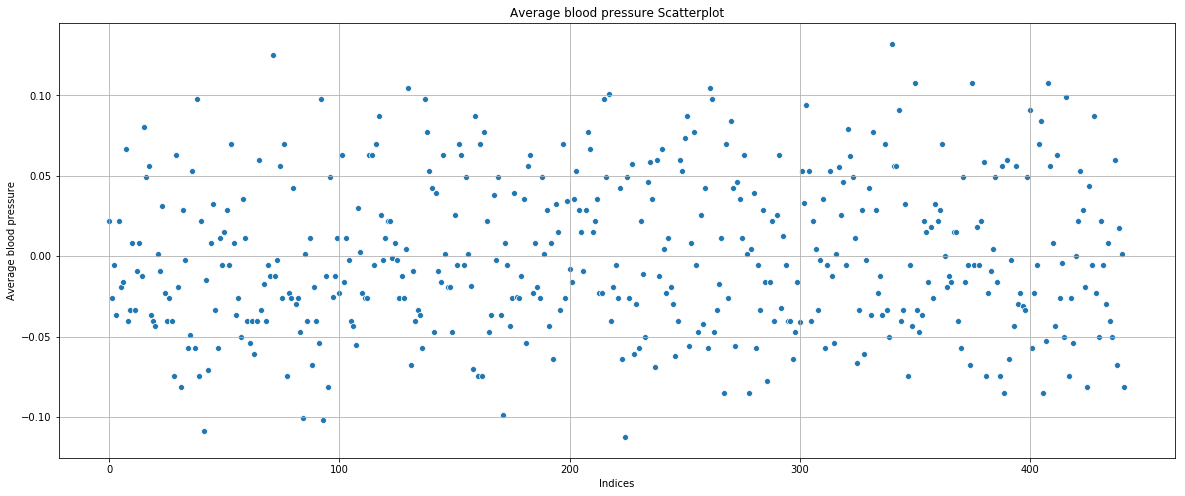

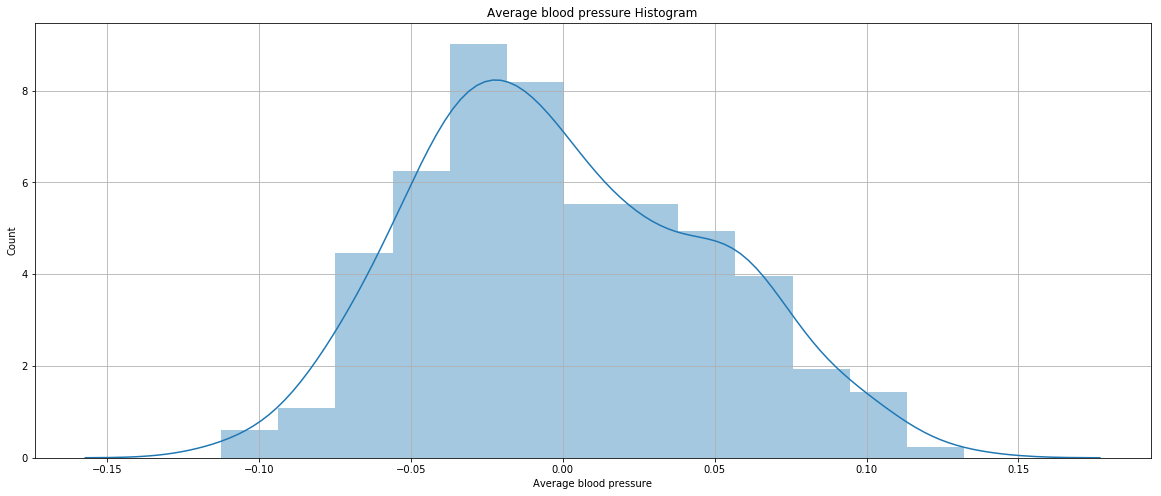

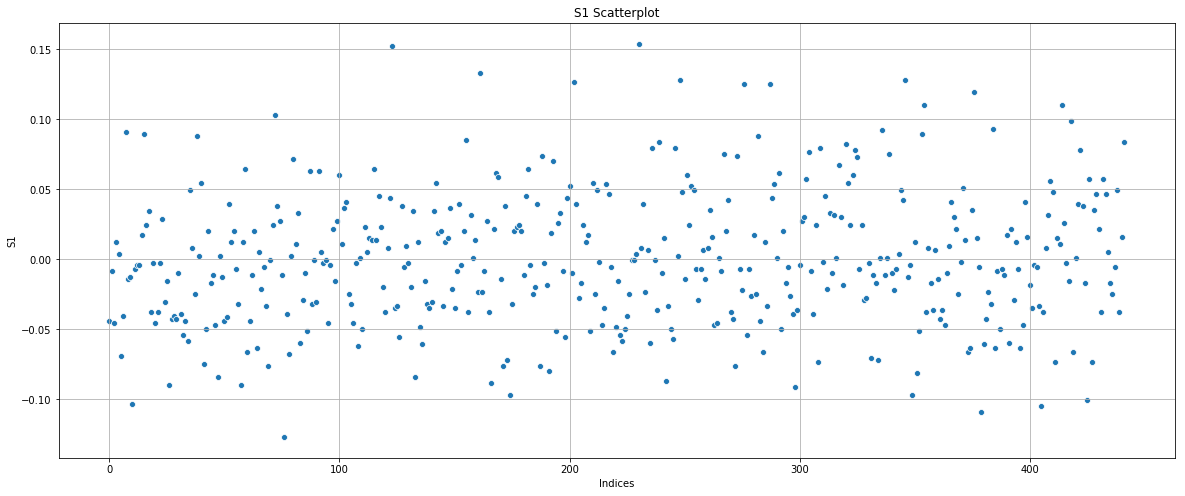

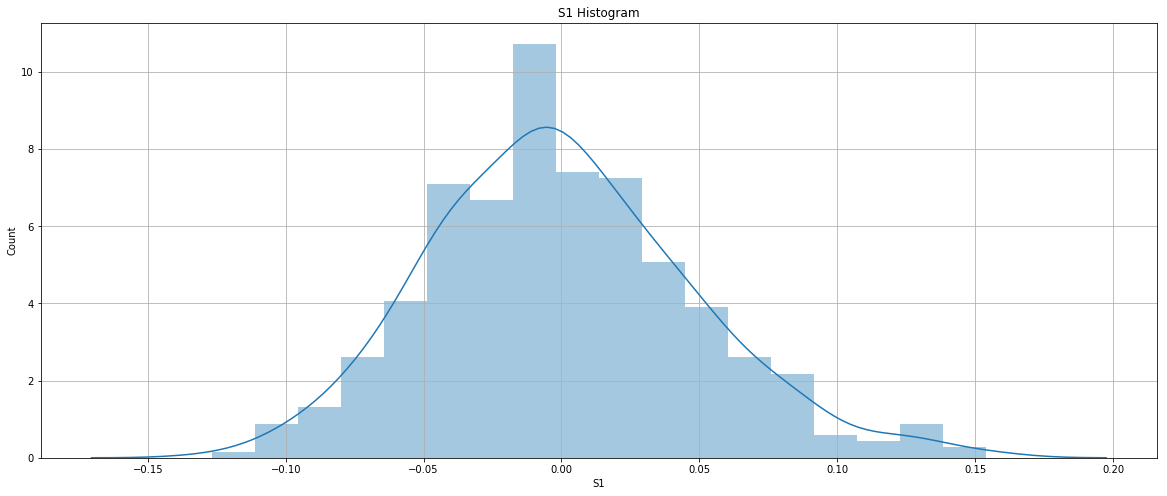

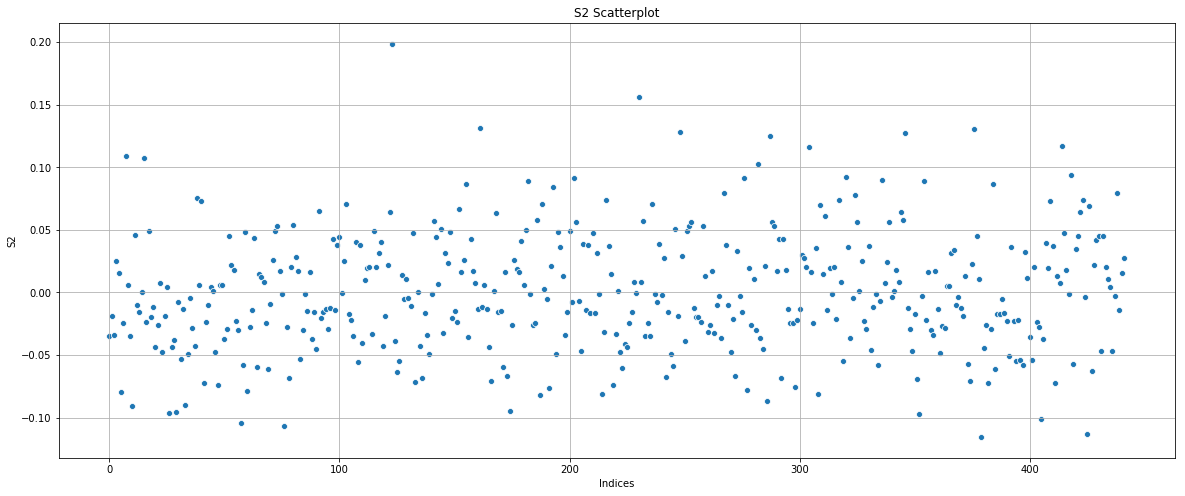

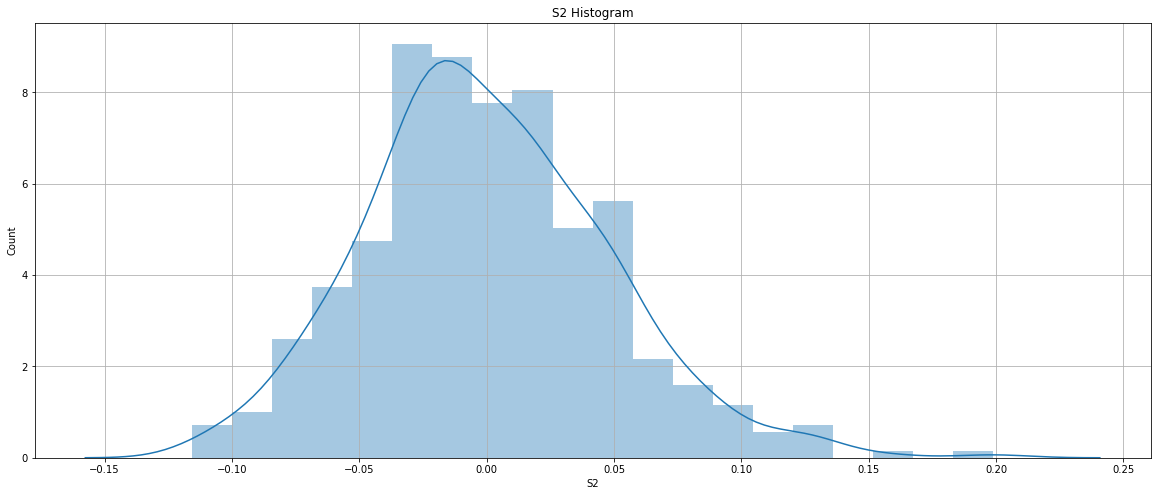

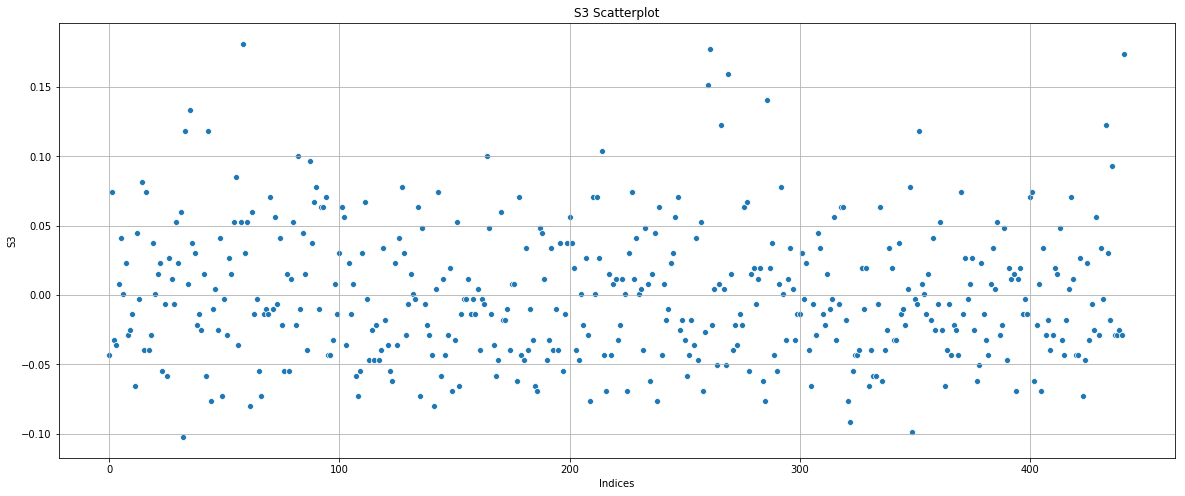

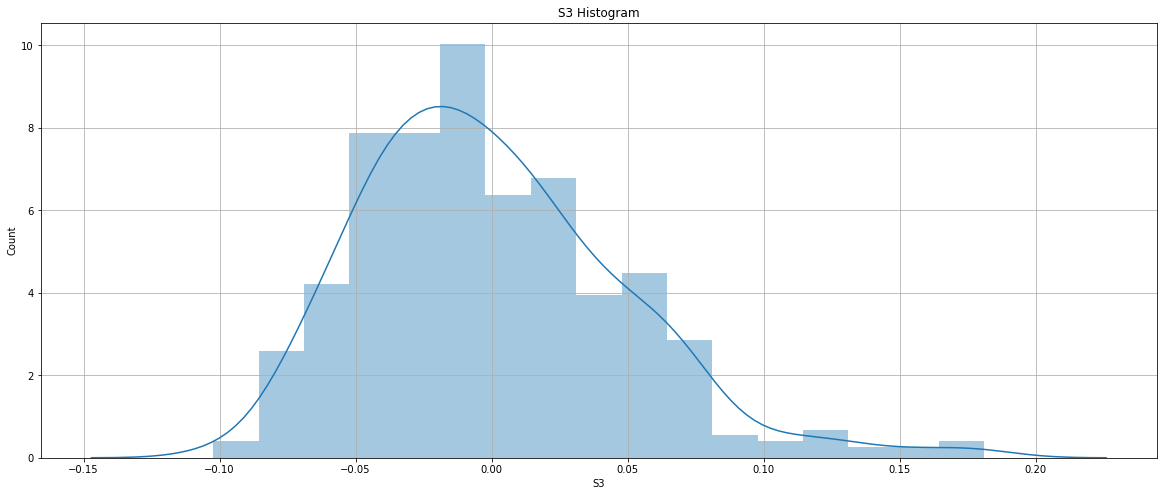

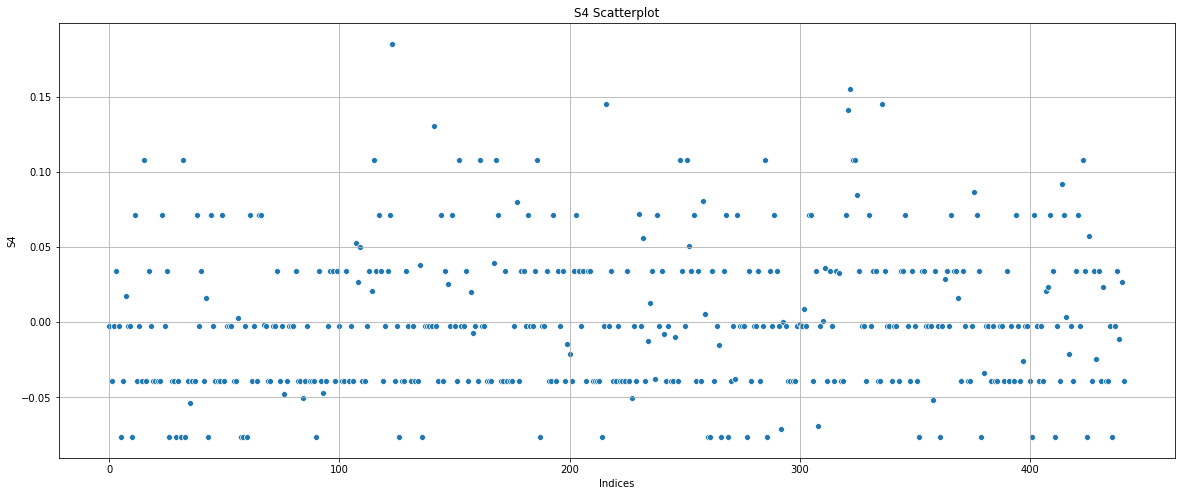

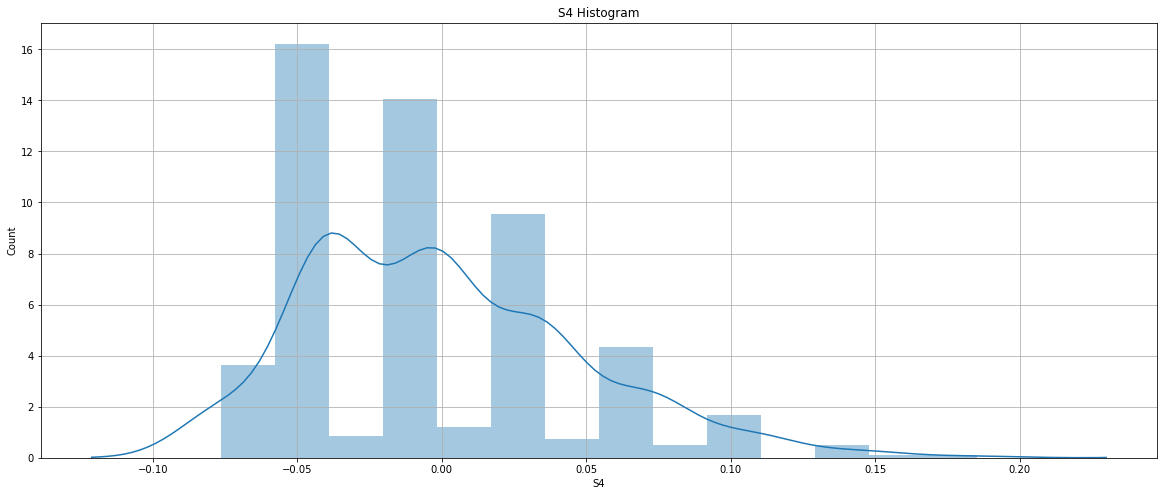

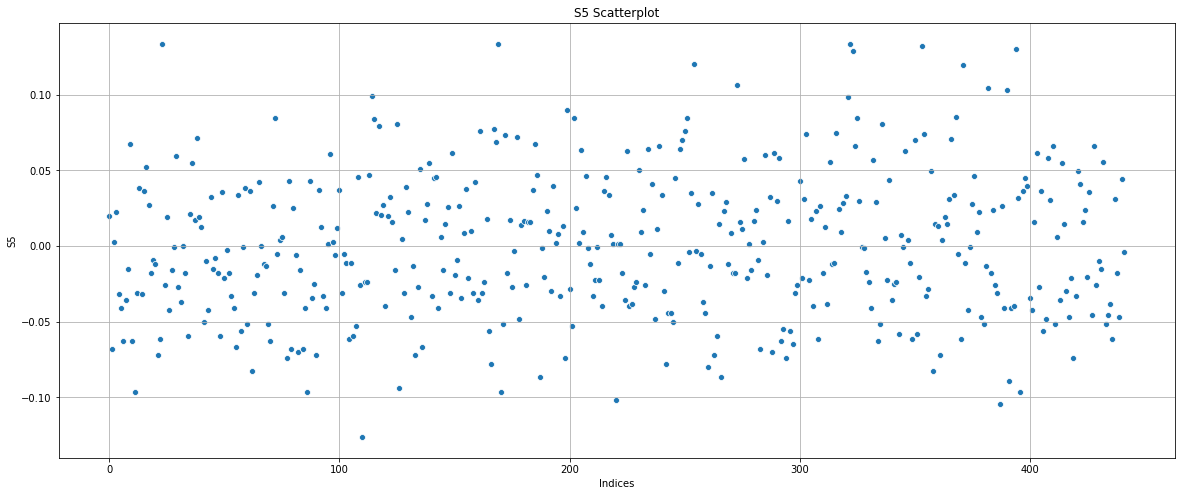

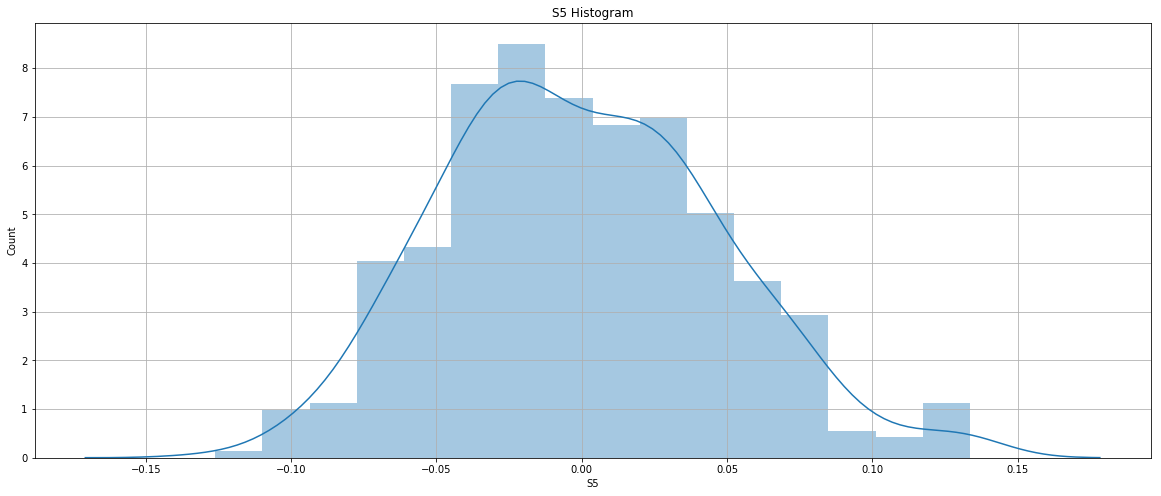

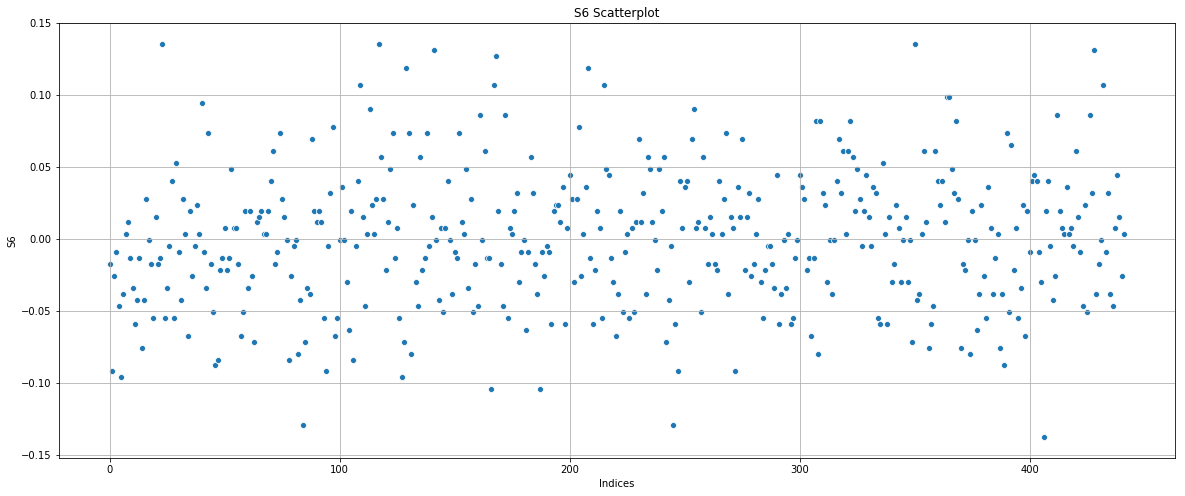

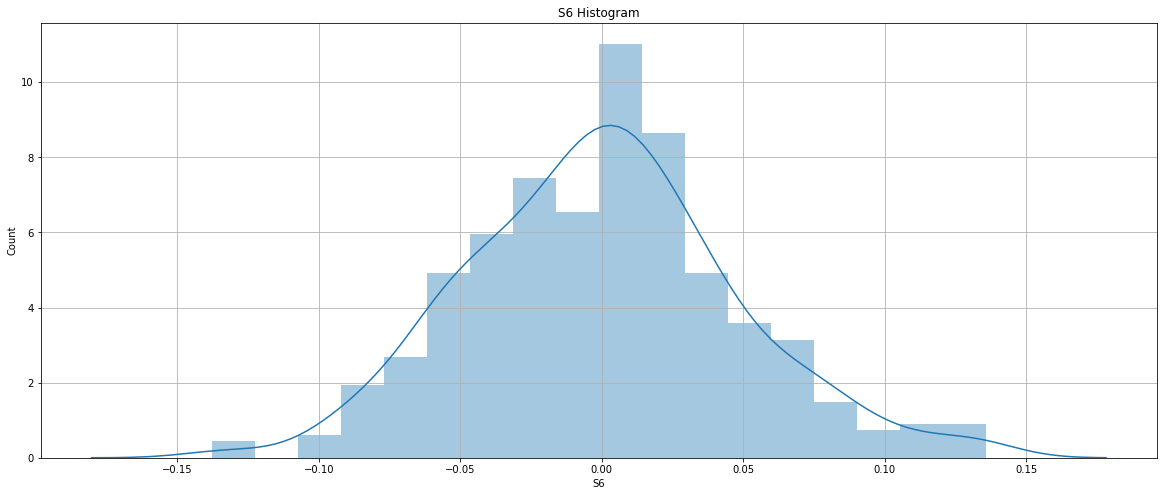

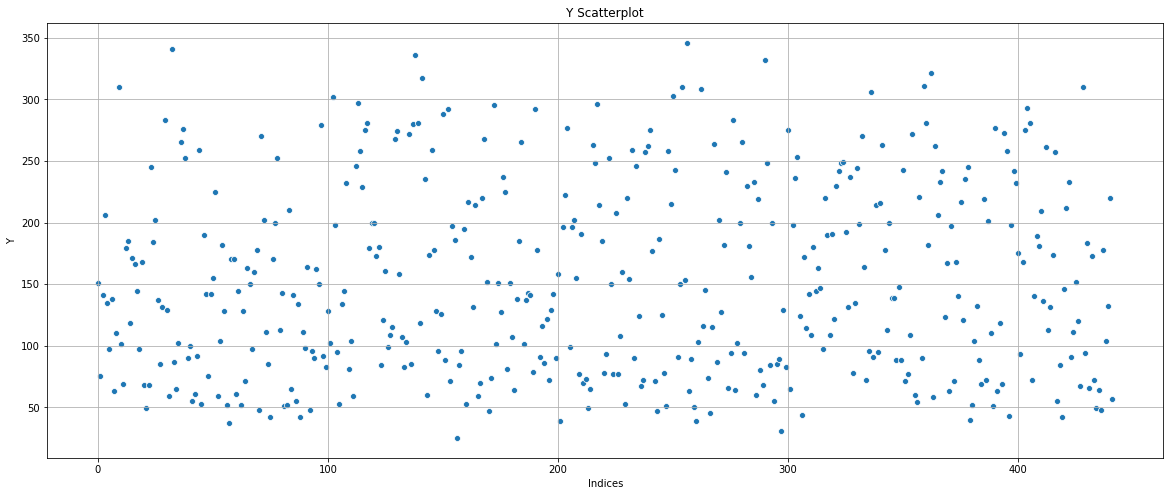

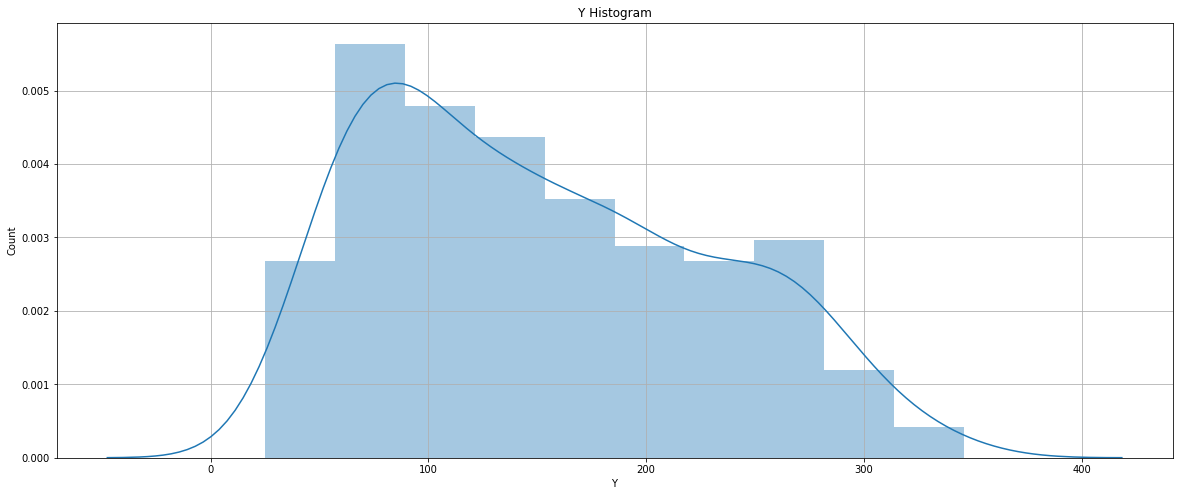

In [7]:
columns = df.columns
indices = range(len(df))
for column in columns : 
    ax = sns.scatterplot(indices, df[column])
    ax.set_title(column + ' Scatterplot')
    ax.set(xlabel='Indices', ylabel=column)
    plt.show()
    
    ax = sns.distplot(df[column])
    ax.set_title(column + ' Histogram')
    ax.set(xlabel=column , ylabel='Count')
    plt.show()
    

## Correlation
- S1 and S2 have high positive correlation
- S3 and S4 have high negative correlation

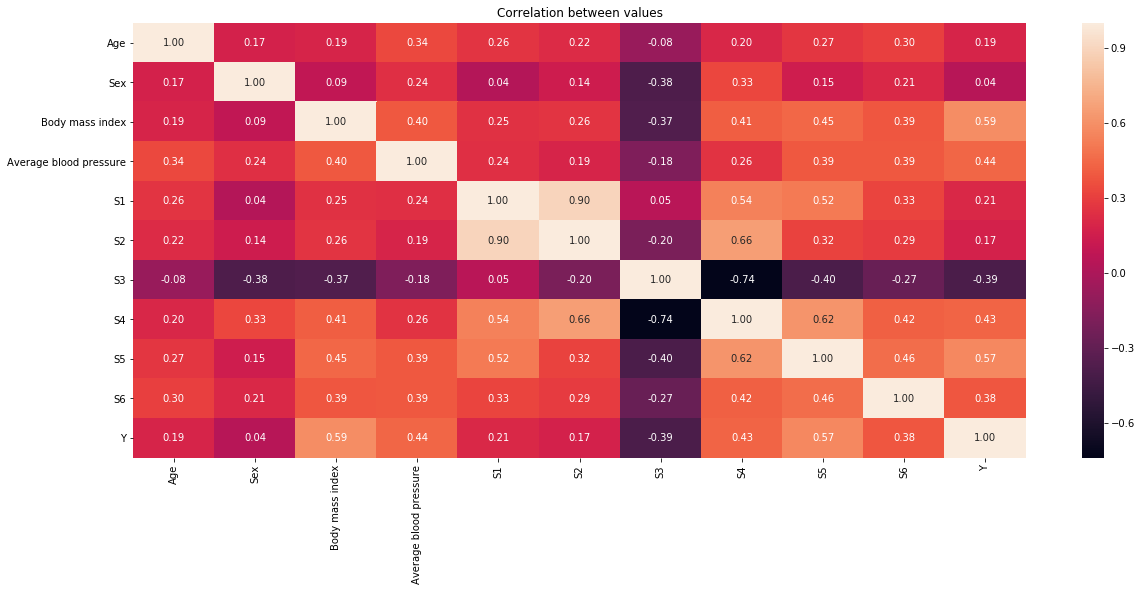

In [8]:
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f")
ax.set_title('Correlation between values')
plt.show()

## Mean, Median, Max, Min

In [9]:
# Without line below, it prints scientific notation like 1.979680e+05
pd.set_option('float_format', '{:f}'.format)
df.describe()

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,152.133484
std,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,77.093005
min,-0.107226,-0.044642,-0.090275,-0.112400,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.037299,-0.044642,-0.034229,-0.036656,-0.034248,-0.030358,-0.035117,-0.039493,-0.033249,-0.033179,87.000000
50%,0.005383,-0.044642,-0.007284,-0.005671,-0.004321,-0.003819,-0.006584,-0.002592,-0.001948,-0.001078,140.500000
75%,0.038076,0.050680,0.031248,0.035644,0.028358,0.029844,0.029312,0.034309,0.032433,0.027917,211.500000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612,346.000000


# Build Regression Model
- Use Linear/Lasso/Ridge Regression, XGBoost
- Use RMSE/R2 Score to evaluate

## Divide train/validation set

In [10]:
data_x = df.drop(['Y'], axis=1)
data_y = df['Y']

display(data_x.head())
display(data_y.head())

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


0   151.000000
1    75.000000
2   141.000000
3   206.000000
4   135.000000
Name: Y, dtype: float64

In [11]:
# Shuffle data
number_datapoints = len(df)
indices = np.arange(number_datapoints)
np.random.shuffle(indices)

ratio = 0.7
length_train = int(number_datapoints * ratio)
length_validation = number_datapoints - length_train

In [12]:
x_train = data_x.iloc[indices[:length_train], :]
y_train = data_y[indices[:length_train]]
x_test = data_x.iloc[indices[length_train:], :]
y_test = data_y[indices[length_train:]]

Train/Validation set were divided

- **Train set** :
    - X : # of samples 309, 10 features
    - Y : # of samples 309
- **Test set** :
    - X : # of samples 133, 10 features
    - Y : # of samples 133

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


## Train / Evaluate

In [14]:
def regression(x_train, y_train, x_test, y_test, show_individualy=False) : 
    # 
    length_train = len(x_train)
    length_all = len(x_train) + len(x_test)
    x_all = pd.concat([x_train, x_test], axis=0)
    y_all = pd.concat([y_train, y_test], axis=0)
    
    # Train train set only
    model_linear = LinearRegression()
    model_linear.fit(x_train, y_train)
    model_lasso = Lasso()
    model_lasso.fit(x_train, y_train)
    model_ridge = Ridge()
    model_ridge.fit(x_train, y_train)
    model_xgb = xgb.XGBRegressor()
    model_xgb.fit(x_train, y_train)
       
    # Predict Train/Test Set 
    yhat_all_linear = model_linear.predict(x_all)
    yhat_all_lasso = model_lasso.predict(x_all)
    yhat_all_ridge = model_ridge.predict(x_all)
    yhat_all_xgb = model_xgb.predict(x_all)
    
    yhat_train_linear = model_linear.predict(x_train)
    yhat_train_lasso = model_lasso.predict(x_train)
    yhat_train_ridge = model_ridge.predict(x_train)
    yhat_train_xgb = model_xgb.predict(x_train)
    
    yhat_test_linear = model_linear.predict(x_test)
    yhat_test_lasso = model_lasso.predict(x_test)
    yhat_test_ridge = model_ridge.predict(x_test)
    yhat_test_xgb = model_xgb.predict(x_test)
    
    # Visualize
    ax = sns.lineplot(x_all.index, y_all, label='True')
    ax.axvspan(length_train, length_all, alpha=0.7, color='#D3D3D3')
    ax.set_title('Regression')
    sns.lineplot(x_all.index, yhat_all_linear, label='Linear')
    sns.lineplot(x_all.index, yhat_all_lasso, label='Lasso')
    sns.lineplot(x_all.index, yhat_all_ridge, label='Ridge')
    sns.lineplot(x_all.index, yhat_all_xgb, label='XGBoost')
    plt.show()
    
    # Show result 
    evaluate(y_train, yhat_train_linear, y_test, yhat_test_linear, 'Linear')
    evaluate(y_train, yhat_train_lasso, y_test, yhat_test_lasso, 'Lasso')
    evaluate(y_train, yhat_train_ridge, y_test, yhat_test_ridge, 'Ridge')
    evaluate(y_train, yhat_train_xgb, y_test, yhat_test_xgb, 'XGBoost')

    # Show result individualy
    if show_individualy==True :
        visualize(x_all, y_all, yhat_all_linear, 'Linear', length_train)
        evaluate(y_train, yhat_train_linear, y_test, yhat_test_linear, 'Linear')
        
        visualize(x_all, y_all, yhat_all_lasso, 'Lassor', length_train)
        evaluate(y_train, yhat_train_lasso, y_test, yhat_test_lasso, 'Lasso')
        
        visualize(x_all, y_all, yhat_all_ridge, 'Ridge', length_train)
        evaluate(y_train, yhat_train_ridge, y_test, yhat_test_ridge, 'Ridge')
        
        visualize(x_all, y_all, yhat_all_xgb, 'XGBoost', length_train)
        evaluate(y_train, yhat_train_xgb, y_test, yhat_test_xgb, 'XGboost')
        
    return
    
def evaluate(y_train, yhat_train, y_test, yhat_test, method) :
    print('[' + method + ']')
    print('* RMSE (Train Set) : %.2f ' % math.sqrt(mean_squared_error(y_train, yhat_train)))
    print('* R^2 (Train Set) : %.2f' % r2_score(y_train, yhat_train))
    print('* RMSE (Test Set) : %.2f ' % math.sqrt(mean_squared_error(y_test, yhat_test)))
    print('* R^2 (Test Set) : %.2f' % r2_score(y_test, yhat_test))
    return

def visualize(x_all, y_all, yhat_all, method, length_train) : 
    length_all = len(y_all)
    ax = sns.lineplot(x_all.index, y_all, label='True')
    ax.axvspan(length_train, length_all, alpha=0.7, color='#D3D3D3')
    ax.set_title('Regression')
    sns.lineplot(x_all.index, yhat_all, label=method)
    plt.show()
    return

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


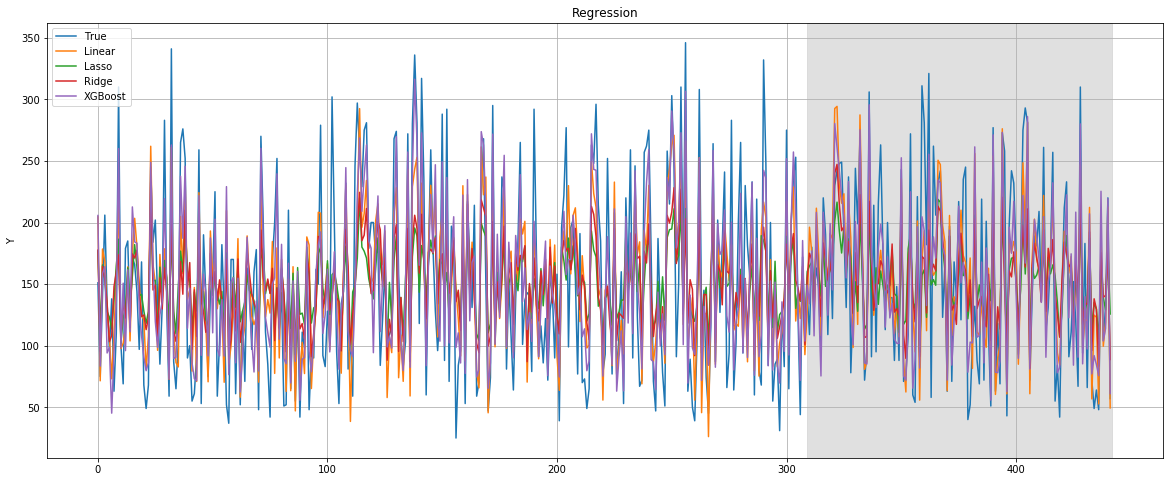

[Linear]
* RMSE (Train Set) : 52.90 
* R^2 (Train Set) : 0.52
* RMSE (Test Set) : 55.67 
* R^2 (Test Set) : 0.49
[Lasso]
* RMSE (Train Set) : 61.13 
* R^2 (Train Set) : 0.36
* RMSE (Test Set) : 64.11 
* R^2 (Test Set) : 0.33
[Ridge]
* RMSE (Train Set) : 57.84 
* R^2 (Train Set) : 0.43
* RMSE (Test Set) : 60.70 
* R^2 (Test Set) : 0.40
[XGBoost]
* RMSE (Train Set) : 30.39 
* R^2 (Train Set) : 0.84
* RMSE (Test Set) : 57.91 
* R^2 (Test Set) : 0.45


In [15]:
    regression(x_train, y_train, x_test, y_test, show_individualy=False)

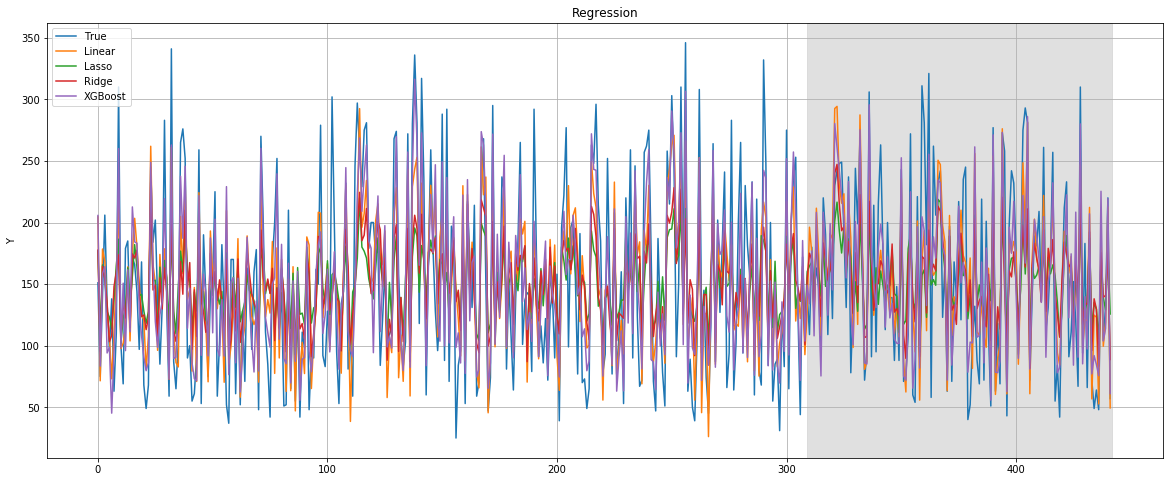

[Linear]
* RMSE (Train Set) : 52.90 
* R^2 (Train Set) : 0.52
* RMSE (Test Set) : 55.67 
* R^2 (Test Set) : 0.49
[Lasso]
* RMSE (Train Set) : 61.13 
* R^2 (Train Set) : 0.36
* RMSE (Test Set) : 64.11 
* R^2 (Test Set) : 0.33
[Ridge]
* RMSE (Train Set) : 57.84 
* R^2 (Train Set) : 0.43
* RMSE (Test Set) : 60.70 
* R^2 (Test Set) : 0.40
[XGBoost]
* RMSE (Train Set) : 30.39 
* R^2 (Train Set) : 0.84
* RMSE (Test Set) : 57.91 
* R^2 (Test Set) : 0.45


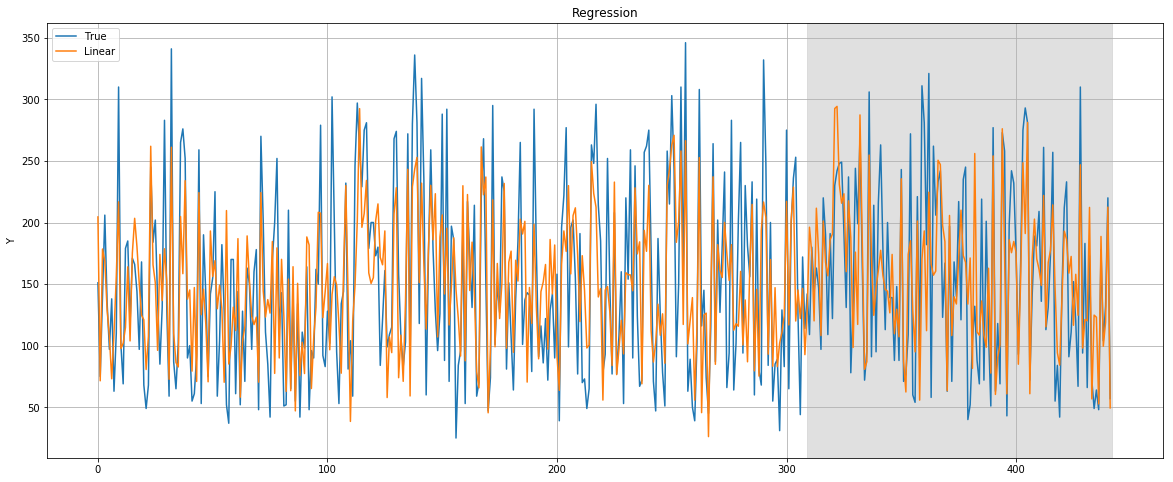

[Linear]
* RMSE (Train Set) : 52.90 
* R^2 (Train Set) : 0.52
* RMSE (Test Set) : 55.67 
* R^2 (Test Set) : 0.49


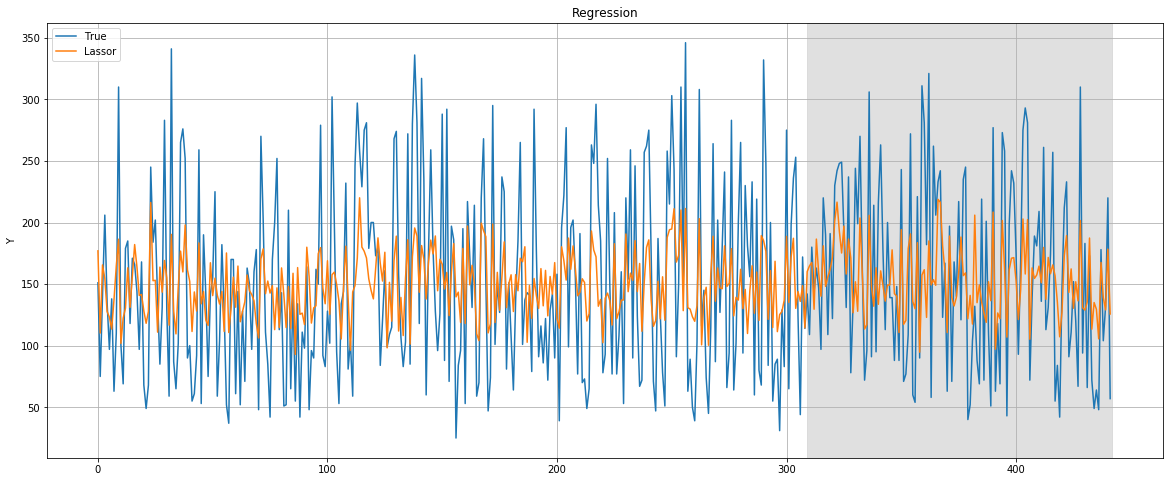

[Lasso]
* RMSE (Train Set) : 61.13 
* R^2 (Train Set) : 0.36
* RMSE (Test Set) : 64.11 
* R^2 (Test Set) : 0.33


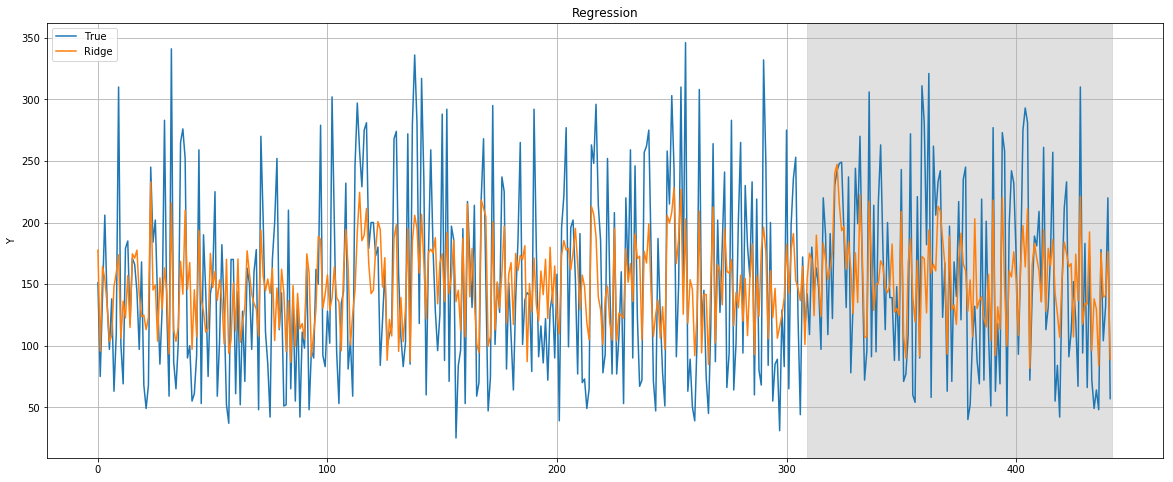

[Ridge]
* RMSE (Train Set) : 57.84 
* R^2 (Train Set) : 0.43
* RMSE (Test Set) : 60.70 
* R^2 (Test Set) : 0.40


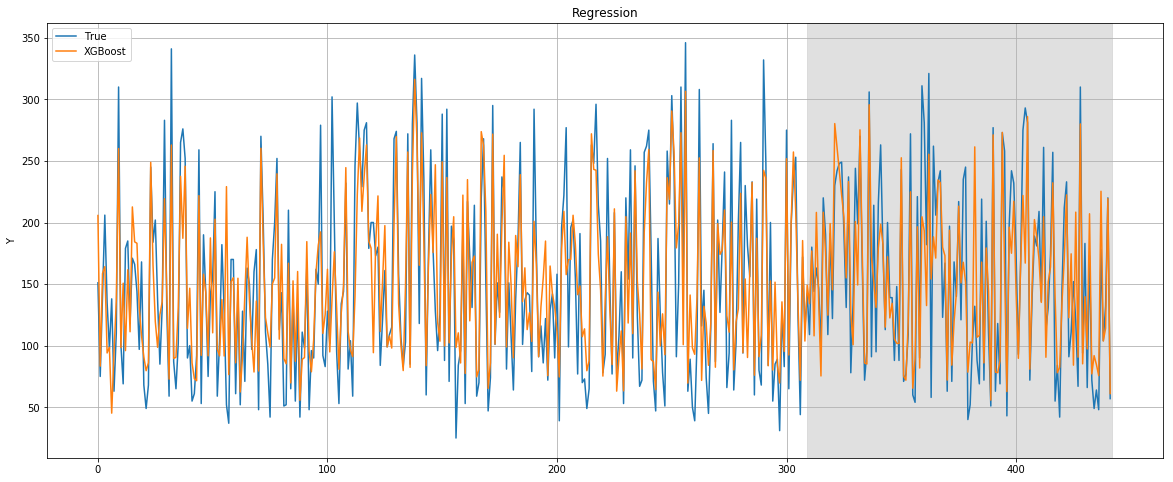

[XGboost]
* RMSE (Train Set) : 30.39 
* R^2 (Train Set) : 0.84
* RMSE (Test Set) : 57.91 
* R^2 (Test Set) : 0.45


In [16]:
    regression(x_train, y_train, x_test, y_test, show_individualy=True)